<a href="https://colab.research.google.com/github/theysee/sberbank_reboot/blob/master/%D0%9F%D0%BE%D1%82%D0%BE%D0%BA_3_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BA_%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D1%8E_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика



*   [Презентация](https://docs.google.com/presentation/d/100xFwSILlxsoaAj98FW5ztneo03fRyob-33IKOvpJqM/edit?usp=sharing)
*   [master](https://colab.research.google.com/drive/1ZmBW1QzhWjPQGs1E3oFDvaygKZZAQ6CP)



In [0]:
!pip install PyMySQL

In [0]:
!pip install pandas

In [0]:
import pymysql
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


# доступны student-ы от 0 до 49
# в этот раз важно взять своего student-а. Если в коде ниже увидите, что в вашей базе уже есть таблицы, то выберите другого пользователя.
# НЕ ЗАБУДЬТЕ ВЫПОЛНИТЬ КОД ЭТОЙ КЛЕТКИ



DB_HOST = '89.223.95.235'
DB_USER = 'student_12'
DB_USER_PASSWORD = 'student_12'
DB_NAME = 'student_12'

In [0]:
conn = pymysql.connect(DB_HOST, DB_USER, DB_USER_PASSWORD, DB_NAME)
pd.read_sql_query("show tables", conn)

,Tables_in_student_12


### Шаг 1
Сгенерируем данные по показам, кликам, и деньгам по 5 объявлениям с названиями Advertising_0, Advertising_1, ...

Просто выполните две клетки ниже

In [0]:
adv_sample = 'Advertising_{}'
advertisings = []
for i in range(5):
  advertisings.append(adv_sample.format(i))
advertisings

['Advertising_0',
 'Advertising_1',
 'Advertising_2',
 'Advertising_3',
 'Advertising_4']

In [0]:
from datetime import datetime, timedelta, date
DATE_FORMAT = '%Y-%m-%d'
start_date = date(2019, 8, 1)
data = {}
for adv_id in range(1, len(advertisings)+1):
  day_data = []
  data[adv_id] = []
  for idx, events_number in enumerate(np.random.random_integers(50, 100, 30)):
    events = np.zeros(events_number)
    events[np.random.rand(events_number) > 0.5] = 1
    money = np.round(events * np.random.rand(events_number)*10 + np.random.rand(events_number), 2)
    dt = start_date + timedelta(days=idx)
    dates = [dt.strftime(DATE_FORMAT) for j in range(events_number)]
    day_data = list(zip(dates, events, money))
    data[adv_id] += day_data
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: This function is deprecated. Please call randint(50, 100 + 1) instead
  


{1: [('2019-08-01', 1.0, 7.58),
  ('2019-08-01', 1.0, 7.62),
  ('2019-08-01', 1.0, 7.55),
  ('2019-08-01', 0.0, 0.51),
  ('2019-08-01', 0.0, 0.35),
  ('2019-08-01', 1.0, 3.84),
  ('2019-08-01', 1.0, 7.32),
  ('2019-08-01', 1.0, 1.33),
  ('2019-08-01', 1.0, 5.74),
  ('2019-08-01', 1.0, 2.41),
  ('2019-08-01', 0.0, 0.76),
  ('2019-08-01', 0.0, 0.17),
  ('2019-08-01', 0.0, 0.29),
  ('2019-08-01', 1.0, 1.4),
  ('2019-08-01', 0.0, 0.72),
  ('2019-08-01', 1.0, 7.5),
  ('2019-08-01', 1.0, 4.85),
  ('2019-08-01', 0.0, 0.44),
  ('2019-08-01', 0.0, 0.33),
  ('2019-08-01', 1.0, 9.49),
  ('2019-08-01', 0.0, 0.52),
  ('2019-08-01', 0.0, 0.9),
  ('2019-08-01', 1.0, 8.53),
  ('2019-08-01', 0.0, 0.58),
  ('2019-08-01', 0.0, 0.88),
  ('2019-08-01', 1.0, 2.01),
  ('2019-08-01', 0.0, 0.25),
  ('2019-08-01', 0.0, 0.34),
  ('2019-08-01', 0.0, 0.96),
  ('2019-08-01', 0.0, 0.54),
  ('2019-08-01', 0.0, 0.32),
  ('2019-08-01', 1.0, 1.84),
  ('2019-08-01', 0.0, 0.79),
  ('2019-08-01', 1.0, 1.81),
  ('2019-08-01

In [0]:
data.keys()

dict_keys([1, 2, 3, 4, 5])

Теперь в массиве advertisings у нас лежат названия объявлений, а в словаре data ключом является идентификатор объявления в нашей будущей базе данных (при использовании AUTO_INCREMENT PRIMARY KEY идентификаторы будут от 1 до 5 соответственно). 

Значениями в словаре data являются массивы tuple-ов в которых по порядку записана дата события, тип события, а также кол-во денег, которое стоило это событие. 

*   0 это показ
*   1 это клик (если был клик, то был и показ)
*   кол-во денег указано в рублях



In [0]:
data[1][0][2]

7.58

### Шаг 2
Создадим структуру таблиц.
Нам понадобится создать две таблицы. В одной будут храниться названия объявлений с их уникальным идентификатором, а во второй будут храниться события, относящиеся к этим объявлениям. При этом вторая таблица связана с первой таблицей первичным ключом.

In [0]:
# выполните, чтобы получить объект соединения
conn = pymysql.connect(DB_HOST, DB_USER, DB_USER_PASSWORD, DB_NAME) # создаём соединение

In [0]:
# выполните эту клетку если захотите удалить ошибочно созданную таблицу adv_glossary
query = "DROP TABLE IF EXISTS adv_glossary"

conn.cursor().execute(query) # выполняем запрос
conn.commit() # сохраняем изменения

/usr/local/lib/python3.6/dist-packages/pymysql/cursors.py:170: Warning: (1051, "Unknown table 'student_12.adv_glossary'")
  result = self._query(query)


In [0]:
# выполните эту клетку если захотите удалить ошибочно созданную таблицу adv_events
query = "DROP TABLE IF EXISTS adv_events"


conn.cursor().execute(query) # выполняем запрос
conn.commit() # сохраняем изменения

/usr/local/lib/python3.6/dist-packages/pymysql/cursors.py:170: Warning: (1051, "Unknown table 'student_12.adv_events'")
  result = self._query(query)


In [0]:
# напишите запрос для создания таблицы с объявлениями
query = """
  CREATE TABLE IF NOT EXISTS Annonce (
    annonce_id INT AUTO_INCREMENT PRIMARY KEY,
    annonce_name VARCHAR(50)
  )
"""

conn.cursor().execute(query)
conn.commit()

In [0]:
# напишите запрос для создания таблицы с событиями по объявлениям
query = """
  CREATE TABLE IF NOT EXISTS Events (
    events_id INT AUTO_INCREMENT PRIMARY KEY,
    annonce_id INT,
    date_events DATETIME,
    result_events INT,
    income_events NUMERIC
    )
""" 

conn.cursor().execute(query)
conn.commit()

In [0]:
# а также добавьте ограничение целостности на идентификатор объявления
query = """
  ALTER TABLE Events ADD
  FOREIGN KEY (annonce_id) REFERENCES Annonce(annonce_id)
"""

#conn.cursor().execute(query)
#conn.commit()

In [0]:
#query = "DROP TABLE IF EXISTS Annonce"
#conn.cursor().execute(query)
#conn.commit()

In [0]:
#query = """DELETE FROM Annonce"""
#conn.cursor().execute(query)
#conn.commit()

In [84]:
pd.read_sql_query("show tables",conn)

,Tables_in_student_12
0,annonce
1,events


### Шаг 3
Теперь, когда таблицы созданы, наполните их данными. Это может занять некоторое время, подождите, выпейте чаю;). Заметьте, если внешний ключ создан правильно, то база не даст вписать данные с несуществующими связями. 
С какой базы надо начать наполнение?

In [0]:
queries = []

for i in advertisings:
  querie = f'''INSERT INTO Annonce (annonce_name) VALUES ('{i}')'''
  queries.append(querie)

for q in queries:
  conn.cursor().execute(q)
#conn.commit()

In [74]:
#queries = "INSERT INTO people (name, passport) VALUES ('Spy', 12345)"
queries = []

for i, j in data.items():
  for k in j:
    querie = f'''INSERT INTO Events (annonce_id, date_events, result_events, income_events) VALUES ('{i}', '{k[0]}', '{k[1]}', '{k[2]}')'''
    queries.append(querie)

for q in queries:
  conn.cursor().execute(q)
#conn.commit()

/usr/local/lib/python3.6/dist-packages/pymysql/cursors.py:170: Warning: (1265, "Data truncated for column 'income_events' at row 1")
  result = self._query(query)


### Шаг 4
Проверьте, что данные действительно появились в таблицах

In [85]:
pd.read_sql_query('''SELECT * FROM Annonce''', conn)

,annonce_id,annonce_name
0,1,Advertising_0
1,2,Advertising_1
2,3,Advertising_2
3,4,Advertising_3
4,5,Advertising_4


In [75]:
pd.read_sql_query('''SELECT * FROM Events''', conn)

,events_id,annonce_id,date_events,result_events,income_events
0,1,1,2019-08-01,0,0.0
1,2,1,2019-08-01,1,5.0
2,3,1,2019-08-01,1,6.0
3,4,1,2019-08-01,0,1.0
4,5,1,2019-08-01,0,1.0
...,...,...,...,...,...
11248,11249,5,2019-08-30,0,1.0
11249,11250,5,2019-08-30,0,0.0
11250,11251,5,2019-08-30,1,5.0
11251,11252,5,2019-08-30,0,0.0


### Шаг 5
Теперь для каждого объявления посчитайте [CTR](https://ru.wikipedia.org/wiki/CTR_(%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BD%D0%B5%D1%82)#targetText=CTR%20(%D1%81%D0%B8%D0%BD%D0%BE%D0%BD%D0%B8%D0%BC%20%E2%80%94%20%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0%D0%B1%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D1%8C%2C%20%D0%BE%D1%82,%D1%87%D0%B8%D1%81%D0%BB%D1%83%20%D0%BF%D0%BE%D0%BA%D0%B0%D0%B7%D0%BE%D0%B2%2C%20%D0%B8%D0%B7%D0%BC%D0%B5%D1%80%D1%8F%D0%B5%D1%82%D1%81%D1%8F%20%D0%B2%20%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D0%BD%D1%82%D0%B0%D1%85.&targetText=%D0%9D%D0%B0%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80%3A%20%D1%80%D0%B5%D0%BA%D0%BB%D0%B0%D0%BC%D0%BD%D1%8B%D0%B9%20%D0%B1%D0%BB%D0%BE%D0%BA%20%D0%B1%D1%8B%D0%BB%20%D0%BF%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD,%D0%BD%D0%B0%20%D0%BD%D0%B5%D0%B3%D0%BE%20%D0%BA%D0%BB%D0%B8%D0%BA%D0%BD%D1%83%D0%BB%D0%B8%202%20%D1%80%D0%B0%D0%B7%D0%B0.) и [CPM](http://promo-sa.ru/seo-terms/cpm) за каждый день с помощью sql запроса, и выведите результат в pandas.

В результирующем датафрейме должно быть отражено название объявления, дата, CTR за день, CPM за день.

In [0]:
# data = pd.read_sql_query("", conn) # считаем данные в переменную
# Всё сводится к тому ,чтобы посчитать кол-во кликов и кол-во показов. 
# Подсказка: используйте конструкцию CASE WHEN и агрегатную функцию SUM

In [0]:
adv_data = pd.read_sql_query('''

SELECT
  date_events,
  annonce_name,
  CASE
    WHEN annonce_name='Advertising_0' THEN COUNT(annonce_name)
    WHEN annonce_name='Advertising_1' THEN COUNT(annonce_name)
    WHEN annonce_name='Advertising_2' THEN COUNT(annonce_name)
    WHEN annonce_name='Advertising_3' THEN COUNT(annonce_name)
    WHEN annonce_name='Advertising_4' THEN COUNT(annonce_name)
  END AS impressions,
  CASE
    WHEN annonce_name='Advertising_0' THEN SUM(result_events)
    WHEN annonce_name='Advertising_1' THEN SUM(result_events)
    WHEN annonce_name='Advertising_2' THEN SUM(result_events)
    WHEN annonce_name='Advertising_3' THEN SUM(result_events)
    WHEN annonce_name='Advertising_4' THEN SUM(result_events)
  END AS clicks,
  CASE
    WHEN annonce_name='Advertising_0' THEN (SUM(result_events)/COUNT(annonce_name))*100
    WHEN annonce_name='Advertising_1' THEN (SUM(result_events)/COUNT(annonce_name))*100
    WHEN annonce_name='Advertising_2' THEN (SUM(result_events)/COUNT(annonce_name))*100
    WHEN annonce_name='Advertising_3' THEN (SUM(result_events)/COUNT(annonce_name))*100
    WHEN annonce_name='Advertising_4' THEN (SUM(result_events)/COUNT(annonce_name))*100
  END AS CTR,
  CASE
    WHEN annonce_name='Advertising_0' THEN (SUM(income_events)/COUNT(annonce_name))*1000
    WHEN annonce_name='Advertising_1' THEN (SUM(income_events)/COUNT(annonce_name))*1000
    WHEN annonce_name='Advertising_2' THEN (SUM(income_events)/COUNT(annonce_name))*1000
    WHEN annonce_name='Advertising_3' THEN (SUM(income_events)/COUNT(annonce_name))*1000
    WHEN annonce_name='Advertising_4' THEN (SUM(income_events)/COUNT(annonce_name))*1000
  END AS CRM
FROM
  Events
  JOIN Annonce
  ON Events.annonce_id=Annonce.annonce_id
GROUP BY
  date_events,
  annonce_name

''', conn)

In [189]:
adv_data

,date_events,annonce_name,impressions,clicks,CTR,CRM
0,2019-08-01,Advertising_0,85,45.0,52.9412,2976.4706
1,2019-08-01,Advertising_1,71,37.0,52.1127,3140.8451
2,2019-08-01,Advertising_2,62,29.0,46.7742,3516.1290
3,2019-08-01,Advertising_3,100,44.0,44.0000,2950.0000
4,2019-08-01,Advertising_4,71,34.0,47.8873,2760.5634
...,...,...,...,...,...,...
145,2019-08-30,Advertising_0,83,38.0,45.7831,2927.7108
146,2019-08-30,Advertising_1,87,48.0,55.1724,3275.8621
147,2019-08-30,Advertising_2,95,47.0,49.4737,2736.8421
148,2019-08-30,Advertising_3,59,26.0,44.0678,2440.6780


### Шаг 6
Но на таблицу не так интересно смотреть как на графики...

Для каждого объявления постройте дневные графики CTR и CPM.

На всякий случай проследите, чтобы данные были нарисованы по возрастанию даты. Для этого надо либо отсортировать датафрейм по дате, либо проследить, что тип данных у это поля в pandas что-то типа date. Чтобы посмотреть типы полей в pandas используйте атрибут датафрейма .dtypes

In [198]:
adv_data[adv_data.annonce_name=='Advertising_0'].date_events

0     2019-08-01
5     2019-08-02
10    2019-08-03
15    2019-08-04
20    2019-08-05
25    2019-08-06
30    2019-08-07
35    2019-08-08
40    2019-08-09
45    2019-08-10
50    2019-08-11
55    2019-08-12
60    2019-08-13
65    2019-08-14
70    2019-08-15
75    2019-08-16
80    2019-08-17
85    2019-08-18
90    2019-08-19
95    2019-08-20
100   2019-08-21
105   2019-08-22
110   2019-08-23
115   2019-08-24
120   2019-08-25
125   2019-08-26
130   2019-08-27
135   2019-08-28
140   2019-08-29
145   2019-08-30
Name: date_events, dtype: datetime64[ns]

[]

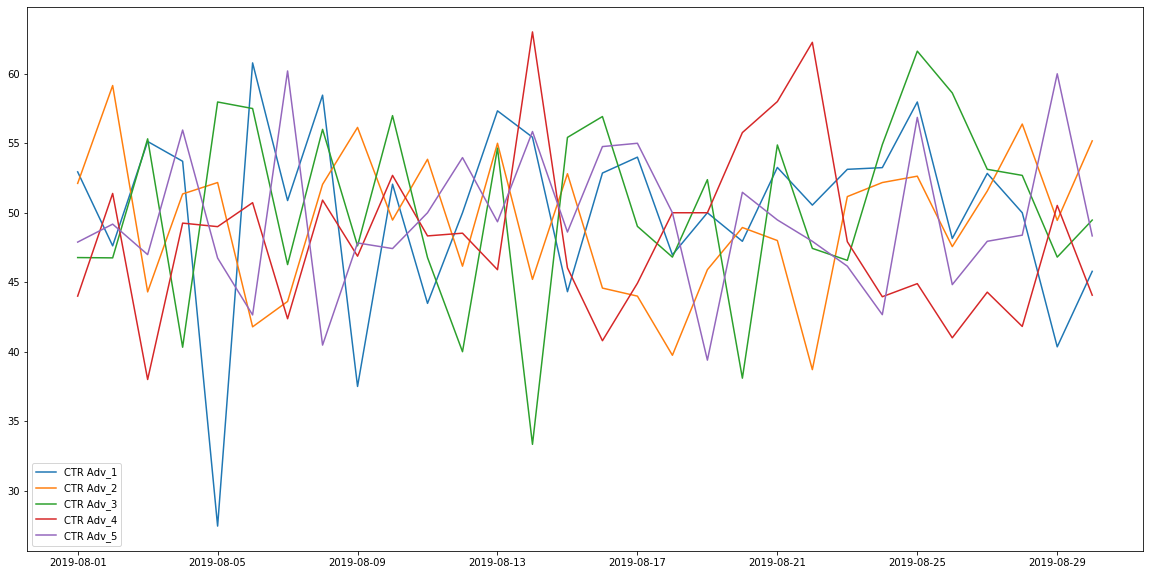

In [207]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(adv_data[adv_data.annonce_name=='Advertising_0'].date_events, adv_data[adv_data.annonce_name=='Advertising_0'].CTR, label = 'CTR Adv_1')
ax.plot(adv_data[adv_data.annonce_name=='Advertising_1'].date_events, adv_data[adv_data.annonce_name=='Advertising_1'].CTR, label = 'CTR Adv_2')
ax.plot(adv_data[adv_data.annonce_name=='Advertising_2'].date_events, adv_data[adv_data.annonce_name=='Advertising_2'].CTR, label = 'CTR Adv_3')
ax.plot(adv_data[adv_data.annonce_name=='Advertising_3'].date_events, adv_data[adv_data.annonce_name=='Advertising_3'].CTR, label = 'CTR Adv_4')
ax.plot(adv_data[adv_data.annonce_name=='Advertising_4'].date_events, adv_data[adv_data.annonce_name=='Advertising_4'].CTR, label = 'CTR Adv_5')

ax.legend()
fig.set_figwidth(20)
fig.set_figheight(10)

plt.plot()

[]

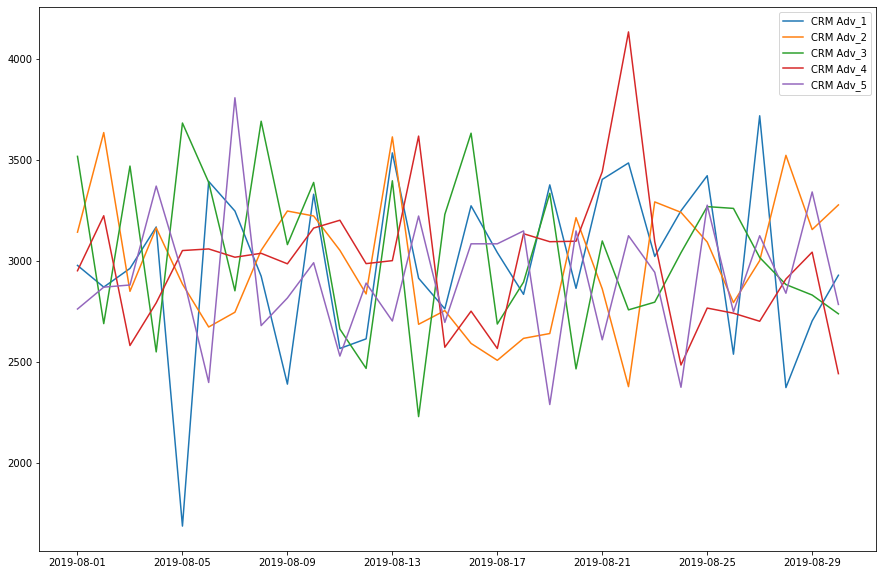

In [208]:
fig, ax = plt.subplots()

ax.plot(adv_data[adv_data.annonce_name=='Advertising_0'].date_events, adv_data[adv_data.annonce_name=='Advertising_0'].CRM, label = 'CRM Adv_1')
ax.plot(adv_data[adv_data.annonce_name=='Advertising_1'].date_events, adv_data[adv_data.annonce_name=='Advertising_1'].CRM, label = 'CRM Adv_2')
ax.plot(adv_data[adv_data.annonce_name=='Advertising_2'].date_events, adv_data[adv_data.annonce_name=='Advertising_2'].CRM, label = 'CRM Adv_3')
ax.plot(adv_data[adv_data.annonce_name=='Advertising_3'].date_events, adv_data[adv_data.annonce_name=='Advertising_3'].CRM, label = 'CRM Adv_4')
ax.plot(adv_data[adv_data.annonce_name=='Advertising_4'].date_events, adv_data[adv_data.annonce_name=='Advertising_4'].CRM, label = 'CRM Adv_5')

ax.legend()
fig.set_figwidth(15)
fig.set_figheight(10)

plt.plot()